<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Homework_Heat_Capacity_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Heat capacity of a solid

Debye's theory of solids gives the heat capacity of a solid at temperature $T$ to be:

$C_V = 9V\rho k_B \left(\frac{T}{\theta_D} \right)^3 \int_0^{\theta_D/T}
      \frac{x^4 e^x}{\left(e^x-1\right)^2} dx
$

where $V$ is the volume of the solid, $\rho$ is the number density of
atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so-called
"Debye temperature", a property of solids that depends on their
density and speed of sound.

##A.
Write a Python function ```cv(T)``` that calculates $C_V$ for a
  given value of the temperature, for a sample consisting of 1000 cubic
  centimeters of solid aluminum, which has a number density of
  $\rho=6.022\times10^{28}\,\mathrm{m}^{-3}$ and a Debye temperature of
  $\theta_D=428\,$K.  Use Gaussian quadrature to evaluate the integral,
  with $N=50$ sample points.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss

User defined values (make sure your units are defined)

In [ ]:
rho = 6.022e28 #units m^-3
theta_D = 428.0 #K
k_B = 1.38064852e-23 #J K^-1
N = 50
V = .001 # m^3

define our function cv and our function we are integrating f

In [ ]:
def f(x):
  return x**4 * np.exp(x)/(np.exp(x)-1)**2

In [ ]:
def cv(T):
  a = 1e-4
  b = theta_D/T
  x_k, w_xk = leggauss(N)
  x_new = x_k*(b-a)*0.5+(b+a)*0.5
  w_new = w_xk*(b-a) * 0.5
  y = f(x_new)
  sum = np.sum(w_new*y)
  return 9*V*rho*k_B*(T/theta_D)**3*sum 

##B.
Use your function to make a graph of the heat capacity as a function
  of temperature from $T=5\,$K to $T=500\,$K.

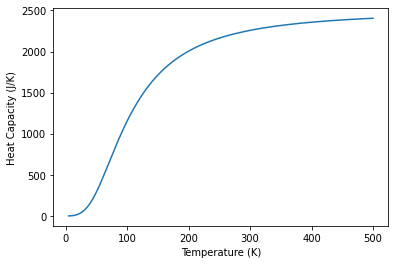

In [ ]:
T_vals = np.arange(5,501)
cv_vals = ([])
for T in T_vals:
  cv_vals.append(cv(T))
plt.plot(T_vals,cv_vals)
plt.xlabel("Temperature (K)")
plt.ylabel("Heat Capacity (J/K)")
plt.show()

#Grading (35 points)

* 10 points: Did you write easy to read code that is well documented, including variable names that make sense and labeled units?

* 10 points: Does your code correctly implement Gaussian quadrature for the desired integral in a function "cv"? This invovles scaling the x and y coordinates and their weights, and scaling the results by the appropriate physical constants as given in the formula.

* 10 points: Does your code produce the correct results in part b?

* 5 points: Is the plot you generated in part b easy to read with properly labeled axis?